In [1]:
import sqlite3
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

database_service = "sqlite"
database = "jupiter.db"
connectable = f"{database_service}:///{database}"

query = 'SELECT "group" FROM moons'

groups = pd.read_sql(query, connectable)

In [2]:
connection = sqlite3.connect('jupiter.db')

cursor = connection.cursor()

columns_query = "PRAGMA table_info(moons);"
cursor.execute(columns_query)
columns = cursor.fetchall()

print("Column names for the 'moons' table:")
for column in columns:
    print(column[1])

cursor.close()
connection.close()


Column names for the 'moons' table:
moon
period_days
distance_km
radius_km
mag
mass_kg
group
ecc
inclination_deg


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

class Moons:
    def __init__(self, db):
        
        database_service = "sqlite"
        self.connectable = f"{database_service}:///{db}"
        self.load_data()
        
    def load_data(self):
       
        query = "SELECT * FROM moons"
        self.data = pd.read_sql(query, self.connectable)
        
    def stats(self, decimal_places=3):

        statdp = self.data.describe()
        statdp2 = statdp.round(decimal_places)
        return statdp2

    def correlations(self, decimal_places=3):

        corrdp = self.data.corr()
        corrdp2 = corrdp.round(decimal_places)
        return corrdp2
        
    def plot_hist(self):
        
        plt.hist(self.data['distance_km'], bins=20, color='skyblue', edgecolor='black')
        plt.title('Distribution of Moon Distances from Jupiter')
        plt.xlabel('Distance (km)')
        plt.ylabel('Frequency')
        plt.show()

    def group_plot(self):
        groups = self.data['group'].unique()
        for group in groups:
            group_data = self.data[self.data['group'] == group]
            plt.scatter(group_data['period_days'], group_data['distance_km'], label=group)
                
        plt.xlabel('Period Days')
        plt.ylabel('Distance km')
        plt.legend(title='Groups', loc='lower right')
        plt.title('Scatter Plot of Period Days vs Distance km by Group')
        plt.show()
        
        sns.displot(data= self.data, x="distance_km", hue="group", col="group")
        plt.show()
    
    def moon(self, moon_name):
        # Extract data for a specific moon
        moon_data = self.data[self.data['moon'] == moon_name]
        return moon_data

################################################################################################################
    
    def linear_regression_model(self):
        
        %matplotlib inline
        
        self.data['T_seconds'] = self.data['period_days'] * 24 * 60 * 60 #converts 
        self.data['T2'] = self.data['T_seconds'] **2
        self.data['a_m'] = self.data['distance_km'] * 1000
        self.data['a3'] = self.data['a_m'] **3
        Y = self.data['T2'].values
        X = self.data['a3'].values.reshape(-1, 1)
        
        sns.regplot(data=self.data, y='T2', x='a3', scatter_kws={'s': 15}, line_kws = {'linewidth': 1})
        plt.title("Scatter Plot")
        plt.show()

        sns.residplot(data=self.data, y='T2', x='a3')
        plt.title("Residual Plot")
        plt.show()
        

        # separate data into training and testing sets
        # use 30% of the data for testing, and the rest for training
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

        model = linear_model.LinearRegression(fit_intercept= False) #hyperparameter set here as I made fit_intercept= False, this is so the linear 

        model.fit(x_train,y_train)
        
        pred = model.predict(x_test)

        f, a0 = plt.subplots(figsize=(15, 15))
        a0.scatter(self.data["a3"], self.data["T2"], label="Actual")        
        a0.plot(x_test.flatten(), pred.flatten(), 'r--', label="Predicted")

        plt.title("Scatter Plot with Predicted Model")
        plt.legend()
        a0.set_xlabel("a3")
        a0.set_ylabel("T2")
        plt.show()
        
        fig, ax = plt.subplots()

        # Create a plot of residuals
        ax.plot(x_test,y_test - pred,'.')

        # Add a horizontal line at zero to guide the eye
        ax.axhline(0, color='k', linestyle='dashed')

        # Add axis labels
        ax.set_xlabel("T2")
        ax.set_ylabel("Residuals")
        ax.set_title("Residual Plot with Predicted Model")
        plt.show()

        
        from sklearn.metrics import r2_score, mean_squared_error
        print(f"unweighted model r2_score: {r2_score(y_test,pred)}")
        print(f"unweighted model root mean squared error: {mean_squared_error(y_test,pred)}")
        
        gradient = model.coef_[0]
        
        print("gradient from model: ", gradient)
        print("intercept from model:", model.intercept_)
        print(f"root mean squared error: {mean_squared_error(y_test,pred, squared=False)}")


        print(f"4π/2GM is = {gradient}")
        G = 6.67e-11 #m3kg−1s−2
        pi = np.pi
        M = (4*(pi)) / (2*(G)*(gradient))
        print(f"The predicted mass of jupiter from my model is: {M}kg")
        actm =  1.899e+27 #kg
        print("The actual mass of jupiter is  1.899e+27 kg")
        print(f"So the actual mass of jupiter is {((actm)/(M))} times heavier than my estimation")
####################################################################################################################

Correlation Statistics:


C:\Users\nickh\AppData\Local\Temp\ipykernel_61292\1036530247.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrdp = self.data.corr()


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,1.000,0.992,-0.534,0.743,-0.504,0.737,0.969
distance_km,0.992,1.000,-0.567,0.799,-0.453,0.751,0.954
radius_km,-0.534,-0.567,1.000,-0.887,0.968,-0.479,-0.488
mag,0.743,0.799,-0.887,1.000,-0.861,0.555,0.689
mass_kg,-0.504,-0.453,0.968,-0.861,1.000,-0.543,-0.489
ecc,0.737,0.751,-0.479,0.555,-0.543,1.000,0.646
inclination_deg,0.969,0.954,-0.488,0.689,-0.489,0.646,1.000


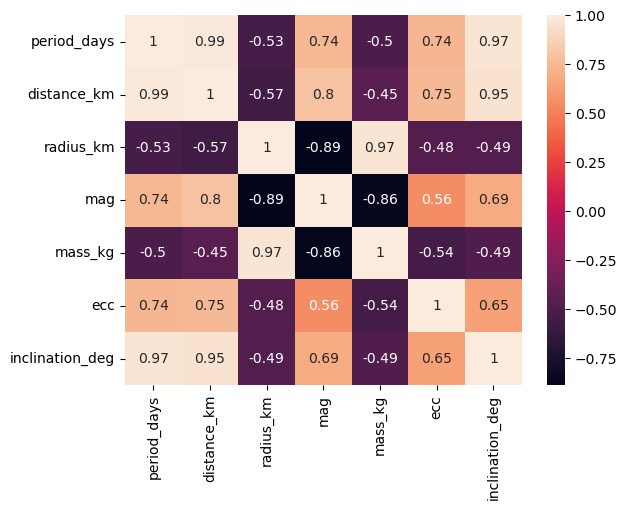

Summary Statistics:


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000,5.600000e+01,56.000,53.000,6.000000e+00,56.000,56.000
mean,525.998,1.775655e+07,158.970,20.418,6.551798e+22,0.223,113.572
std,272.670,8.253688e+06,557.731,4.927,6.010469e+22,0.127,64.563
min,0.290,1.280000e+05,1.000,4.610,2.080000e+18,0.000,0.030
25%,258.750,1.170252e+07,1.500,20.800,1.200276e+22,0.159,30.582
50%,632.500,2.129009e+07,2.000,22.500,6.865891e+22,0.228,148.600
75%,725.500,2.336375e+07,11.562,23.000,1.030252e+23,0.299,159.175
max,787.000,2.458309e+07,2634.100,23.700,1.481900e+23,0.611,166.200


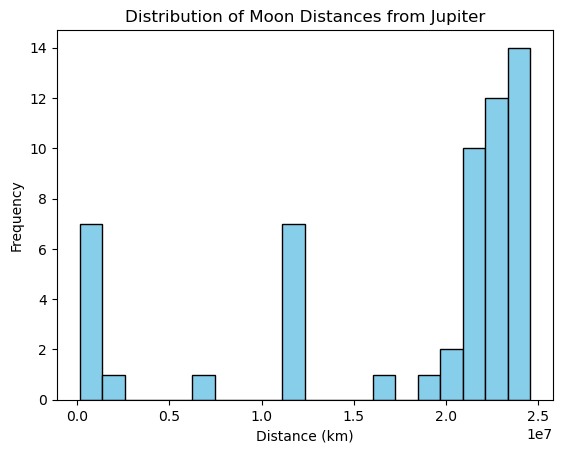

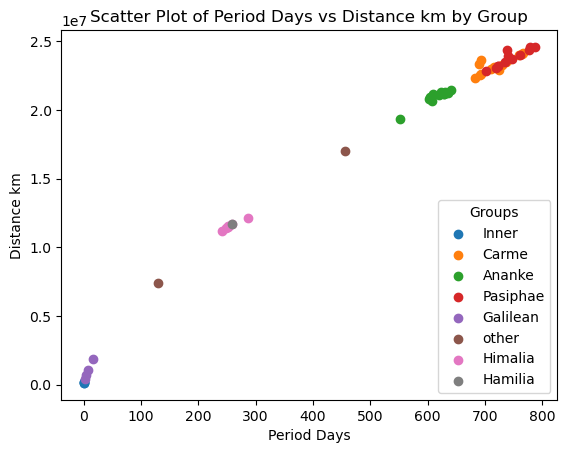

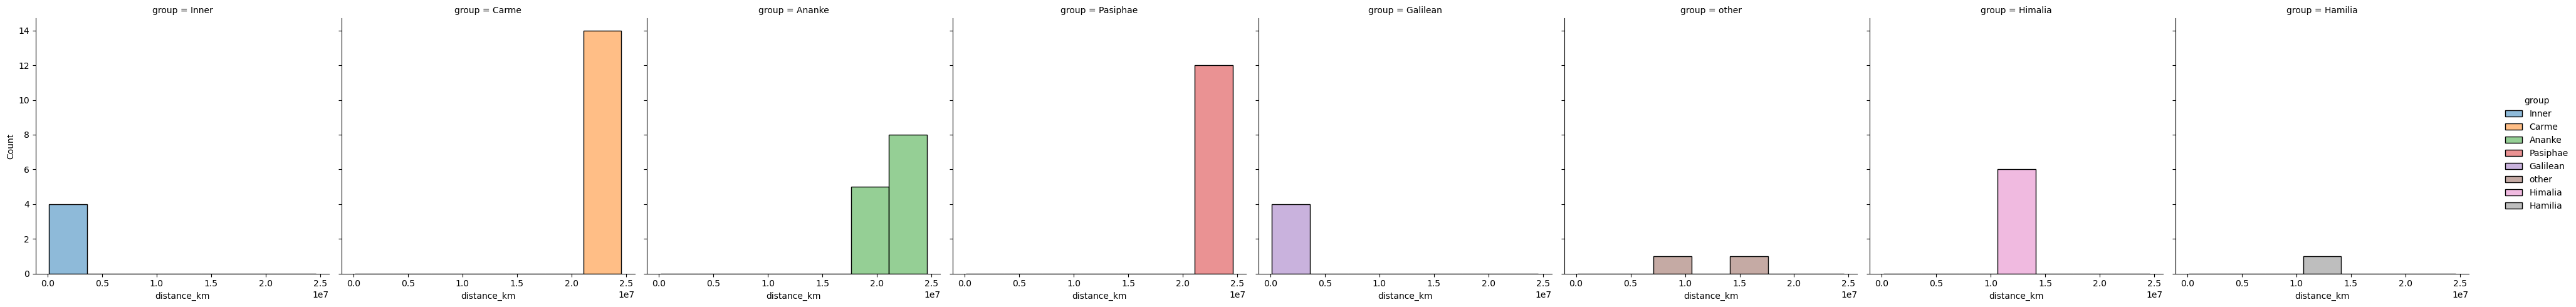


 
 
Data for Io:


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
31,Io,1.75,421700.0,1821.6,5.02,8.931938e+22,Galilean,0.0041,2.2



 
 
Here are some main statistics from the database: 

There are 56.0 moons in the database 

Here are the positive correlations between the variables (coefficient >0.7):


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,NaN,0.992,NaN,0.743,NaN,0.737,0.969
distance_km,0.992,NaN,NaN,0.799,NaN,0.751,0.954
radius_km,NaN,NaN,NaN,NaN,0.968,NaN,NaN
mag,0.743,0.799,NaN,NaN,NaN,NaN,NaN
mass_kg,NaN,NaN,0.968,NaN,NaN,NaN,NaN
ecc,0.737,0.751,NaN,NaN,NaN,NaN,NaN
inclination_deg,0.969,0.954,NaN,NaN,NaN,NaN,NaN


There are 8.0 positive correlations between variables in the dataframe 

These are between: 
Period days and distance (km) 
Period days and inclination degrees 
Period days and magnitude 
Period days and ecc 
Distance (km) and magnitude 
Distance (km) and ecc 
Distance (km) and inclination degrees 
Radius (km) and mass (kg) 

Here are the negative correlations between the variables (coefficient <-0.7):


,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_km,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_km,NaN,NaN,NaN,-0.887,NaN,NaN,NaN
mag,NaN,NaN,-0.887,NaN,-0.861,NaN,NaN
mass_kg,NaN,NaN,NaN,-0.861,NaN,NaN,NaN
ecc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inclination_deg,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 2.0 negative correlations between variables in the dataframe

These are between: 
Magnitude and radius (km) 
Magnitude and mass (kg)

These are how many pieces of data are missing for each variable:
Missing count for variable moon: 0
Missing count for variable period_days: 0
Missing count for variable distance_km: 0
Missing count for variable radius_km: 0
Missing count for variable mag: 3
Missing count for variable mass_kg: 50
Missing count for variable ecc: 0
Missing count for variable inclination_deg: 0


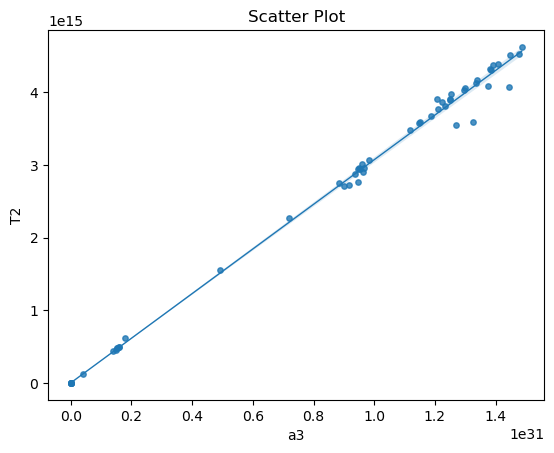

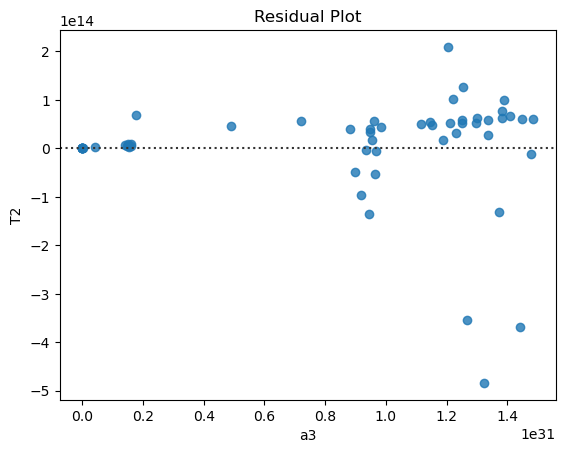

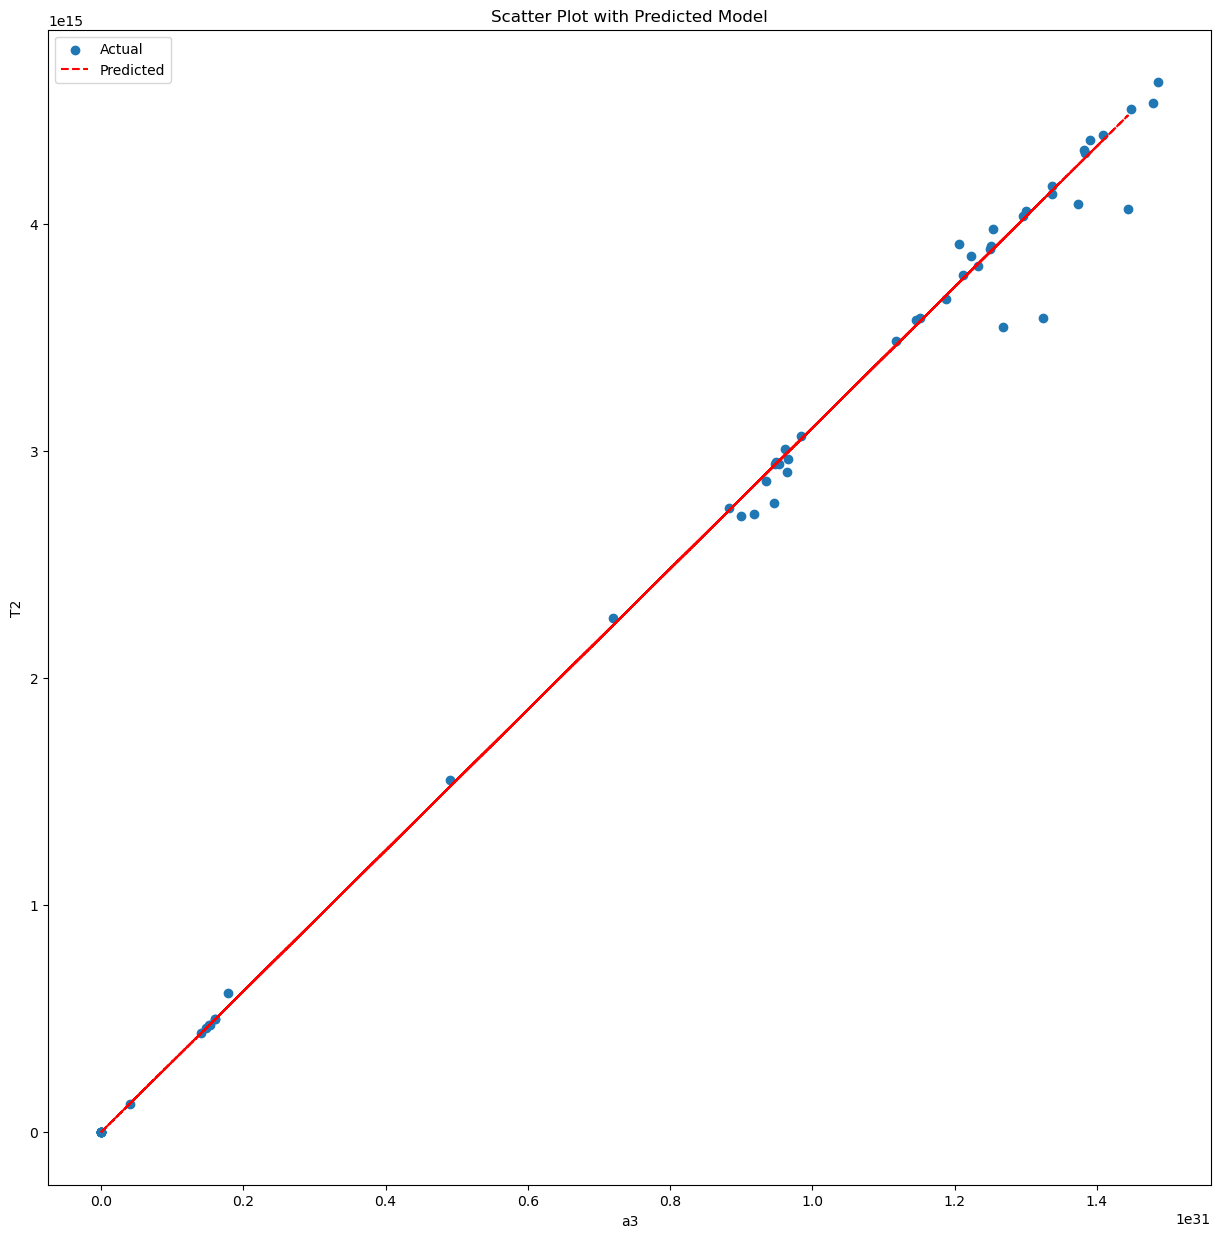

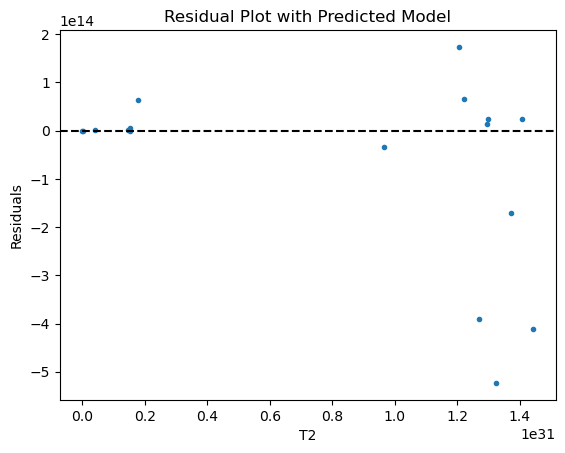

unweighted model r2_score: 0.9875545341797611
unweighted model root mean squared error: 3.916092427036506e+28
gradient from model:  3.101326317699074e-16
intercept from model: 0.0
root mean squared error: 197891193008595.16
4π/2GM is = 3.101326317699074e-16
The predicted mass of jupiter from my model is: 3.0374320409452696e+26kg
The actual mass of jupiter is  1.899e+27 kg
So the actual mass of jupiter is 6.251991729859471 times heavier than my estimation


In [115]:
jupiter_moons = Moons('jupiter.db')

correlations = jupiter_moons.correlations()
print("Correlation Statistics:")
display(correlations)
sns.heatmap(data=correlations, annot=True)
plt.show()


summary_stats = jupiter_moons.stats()
print("Summary Statistics:")
display(summary_stats)

jupiter_moons.plot_hist()

jupiter_moons.group_plot()

io_data = jupiter_moons.moon('Io')
print("\n \n \nData for Io:")
display(io_data)

print("\n \n \nHere are some main statistics from the database: \n")

mooncount = (summary_stats["period_days"]["count"])
print(f"There are {mooncount} moons in the database \n")

positivecorr = correlations[(correlations > 0.7) & (correlations != 1)  ]
print("Here are the positive correlations between the variables (coefficient >0.7):")
display(positivecorr)
countp1 = positivecorr.count().sum()
countp2 = (countp1)/2
print(f"There are {countp2} positive correlations between variables in the dataframe \n")
print("These are between: \nPeriod days and distance (km) \nPeriod days and inclination degrees \nPeriod days and magnitude \nPeriod days and ecc \nDistance (km) and magnitude \nDistance (km) and ecc \nDistance (km) and inclination degrees \nRadius (km) and mass (kg) \n")

negativecorr = correlations[(correlations < -0.7)]
print("Here are the negative correlations between the variables (coefficient <-0.7):")
display(negativecorr)
countn1 = negativecorr.count().sum()
countn2 = (countn1)/2
print(f"There are {countn2} negative correlations between variables in the dataframe\n")
print("These are between: \nMagnitude and radius (km) \nMagnitude and mass (kg)\n")

print("These are how many pieces of data are missing for each variable:")
for column in columns:
    if column[1] != 'group':
        variables = (column[1])
        query = f"SELECT COUNT(*) FROM moons WHERE {variables} IS NULL;"
        missing_count = pd.read_sql(query, connectable)
        count = missing_count.iloc[0, 0]
        print(f"Missing count for variable {variables}: {count}")

jupiter_moons.linear_regression_model()

In [5]:
#this is the origional code with all of the commits, however my python file isnt updating on thid code weirdly so
#ive had to copy and paste it into the acode(2) file where it works